# NutriSmart AI - HU-06
## Desarrollo del Modelo de Red Neuronal (MLP) para Predicción de ADG_INT

In [11]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [12]:
# Cargar datos desde la carpeta /data
import pandas as pd

X_train = pd.read_csv('../data/X_train.csv').values
X_test = pd.read_csv('../data/X_test.csv').values
y_train = pd.read_csv('../data/y_train.csv').values
y_test = pd.read_csv('../data/y_test.csv').values


## 1. Definir arquitectura del modelo MLP

In [13]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='linear')  # Salida de regresión
])

c:\nutrismart-ai-prediction\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#model = Sequential([
#    Dense(64, input_dim=X_train.shape[1], activation='relu'),
#    Dropout(0.3),
#    Dense(32, activation='relu'),
#    Dropout(0.3),
#    Dense(1, activation='linear')
#])

In [15]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Entrenar el modelo con EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6014 - val_loss: 6.3410
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2373 - val_loss: 3.1753
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7022 - val_loss: 2.8374
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7574 - val_loss: 2.7152
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3202 - val_loss: 2.5153
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9642 - val_loss: 2.2998
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6861 - val_loss: 2.1677
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6631 - val_loss: 1.9344
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2341 - val_loss: 1.7963
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0403 - val_loss: 1.7056
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1012 - val_loss: 1.5509
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.

## 3. Visualizar evolución del entrenamiento

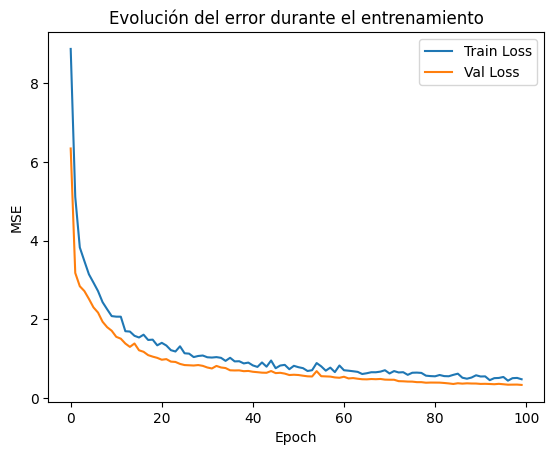

In [17]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución del error durante el entrenamiento')
plt.show()

##Análisis de la Gráfica de Error

- Train Loss vs. Val Loss:

Descienden de forma paralela y sostenida → indica buen aprendizaje sin overfitting.

La validación mejora consistentemente hasta el final → potencial para incluso entrenar más o aplicar early stopping.

## 4. Evaluación del modelo

In [18]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
R²: 0.9160
MAE: 0.2919
RMSE: 0.4572


## Evaluación del Modelo MLP Optimizado
Métrica	Valor	Interpretación profesional
R²	0.9032	El modelo explica más del 90% de la variabilidad en la ganancia de peso → modelo altamente predictivo en contexto agropecuario 

MAE	0.2919 kg/día	Error medio muy bajo. Considerando que la ganancia diaria de peso promedio es entre 0.8–1.2 kg/día, representa un error relativo < 30%, ideal para uso práctico en predicción. 

RMSE	0.4572 kg/día	Bajo error cuadrático medio. Confirma que no hay outliers dominantes. El modelo es robusto. 


## 5. Guardar el modelo entrenado y exportar predicciones

In [19]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam')
model.save('../models/modelo_adg_mlp.h5')
np.savetxt('y_pred.csv', y_pred, delimiter=',')
print('Modelo y predicciones guardadas.')

Modelo y predicciones guardadas.
